<a href="https://colab.research.google.com/github/LFGuzman2105/proyecto_sp1_IA/blob/master/proyecto_IA_dermatologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Proyecto SP1 IA - Dermatología</b></h1>

*   Luis Fernando Guzman Orozco - 21000542
*   Byron Haldair García Guzmán - 22003366
*   Jose Ivan Barreno Bulux - 22003949

# Librerías

In [2]:
import os

# Librería para Redes Neuronales
import tensorflow as tf

# Para realizar gráficas
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# Para manipular datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np

# Para visualizar gráficas más complejas
import seaborn as sns

# Constante global para acelerar entrenamiento
AUTOTUNE = tf.data.AUTOTUNE

# Dataset

In [3]:
'''
El dataset que se utilizará se encuentra en el siguiente enlace:
https://archive.ics.uci.edu/ml/datasets/Dermatology
'''

# Obtiene los dataset
if not os.path.exists("dermatology.data"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

if not os.path.exists("dermatology.names"):
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

--2025-05-29 05:08:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.data’

dermatology.data        [ <=>                ]  25.36K  --.-KB/s    in 0.05s   

2025-05-29 05:08:39 (527 KB/s) - ‘dermatology.data’ saved [25964]

--2025-05-29 05:08:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.names’

dermatology.names       [ <=>                ]   4.54K  --.-KB/s    in 0s      

2025-05-29 05:08:39 (63.1 MB/

In [4]:
# Se carga el dataset
column_names = ['erythema',
                'scaling',
                'definite-borders',
                'itching',
                'koebner phenomenon',
                'polygonal papules',
                'follicular papules',
                'oral-mucosal involvement',
                'knee elbow involvement',
                'scalp involvement',
                'family history',
                'melanin incontinence',
                'eosinophils in the infiltrate',
                'pnl infiltrate',
                'fibrosis of the papillary dermis',
                'exocytosis',
                'acanthosis',
                'hyperkeratosis',
                'parakeratosis',
                'clubbing of the rete ridges',
                'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis',
                'spongiform pustule',
                'munro microabcess',
                'focal hypergranulosis',
                'disappearance of the granular layer',
                'vacuolisation and damage of the basal layer',
                'spongiosis',
                'saw-tooth appearance of retes',
                'follicular horn plug',
                'perifollicular parakeratosis',
                'inflammatory monoluclear infiltrate',
                'band-like infiltrate',
                'age',
                'class']

raw_dataset = pd.read_csv("dermatology.data",
                          names=column_names,
                          header=None,
                          na_values = "?",
                          sep=',')

# Se hace una copia del dataset original
new_dataset = raw_dataset.copy()

# Pre-procesar Dataset

In [5]:
# Muestra un resumen del Dataset
new_dataset.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [6]:
# Vista de las primeras filas del Dataset
new_dataset.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [7]:
# Verifica valores nulos
print(new_dataset.isna().sum())

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

## 1) Procesar valores NaN

In [8]:
# Reemplaza valores nulos con la media de cada columna sin tomar en cuenta la columna target (Class)
imputer = SimpleImputer(strategy='mean')
new_dataset.iloc[:, :-1] = imputer.fit_transform(new_dataset.iloc[:, :-1])

## 2) Variables Independientes y Dependientes

In [9]:
# Se separan las columnas independientes y las dependientes
independent_variables = new_dataset.drop('class', axis=1)
dependent_variables = new_dataset['class'].astype(int)

## 3) Balancear Clases

In [10]:
# Balancear clases con SMOTE
smote = SMOTE(random_state=42)
independent_variables_resampled, dependent_variables_resampled = smote.fit_resample(independent_variables, dependent_variables)

## 4) Normalización de los Datos

In [11]:
# Escala los datos de las variables independientes
scaler = StandardScaler()
independent_variables_scaled = scaler.fit_transform(independent_variables_resampled)

## 5) Dividir Dataset en Sets de Entrenamiento y Prueba

In [12]:
# Divide las variables independientes y dependientes en sets de entrenamiento y prueba
train_set, test_set, train_target, test_target = train_test_split(independent_variables_scaled,
                                                                  dependent_variables_resampled,
                                                                  test_size=0.2,
                                                                  random_state=42)

# One-Hot Encoding de las clases
num_classes = len(np.unique(dependent_variables_resampled))
train_target_cat = tf.keras.utils.to_categorical(train_target - 1, num_classes)  # Clases de 1 a 6
test_target_cat = tf.keras.utils.to_categorical(test_target - 1, num_classes)

In [13]:
train_target_cat, test_target_cat

(array([[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.],

# Modelo IA

## 1) Callbacks

In [14]:
# Interrumpe el entrenamiento del modelo si este no mejora, reduciendo el Overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## 2) Modelo

In [15]:
# Constuye el modelo
model = tf.keras.models.Sequential([
          tf.keras.layers.InputLayer(shape=(train_set.shape[1], )),
          # Se aplica L2 para reducir Overfitting, penalizando pesos grandes
          tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
          # Normaliza el output de la capa anterior para mejorar la estabilidad y rapidez del entrenamiento
          tf.keras.layers.BatchNormalization(),
          # Desactiva el 30% de las neuronas aleatoriamente durante el entrenamiento, evitando Overfitting
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dropout(rate=0.3),
          tf.keras.layers.Dense(units=32, activation='relu'),
          tf.keras.layers.Dense(units=16, activation='relu'),
          tf.keras.layers.Dense(units=num_classes, activation='softmax') # 6 clases
        ])

# CategoricalCrossentropy para problemas de clasificación multiclase con One-Hot Encoding
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Compila y entrena el modelo
model.fit(train_set,
          train_target_cat,
          epochs=200,
          batch_size = 32,
          validation_split=0.1,
          callbacks=[early_stop])

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3048 - loss: 1.8271 - val_accuracy: 0.3704 - val_loss: 1.6880
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5190 - loss: 1.3490 - val_accuracy: 0.5741 - val_loss: 1.4365
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5983 - loss: 1.1326 - val_accuracy: 0.7222 - val_loss: 1.2014
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7297 - loss: 0.9168 - val_accuracy: 0.8148 - val_loss: 0.9972
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8162 - loss: 0.7491 - val_accuracy: 0.8704 - val_loss: 0.8346
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9025 - loss: 0.5635 - val_accuracy: 0.9259 - val_loss: 0.6614
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9549 - loss: 0.4122 - val_accuracy: 0.9444 - val_loss: 0.4997
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9679 - loss: 0.3076 - val_accuracy: 0.9

# Evaluación

In [16]:
# Evalua el modelo
loss, accuracy = model.evaluate(x=test_set, y=test_target_cat, batch_size=32)
print(f"Acurracy: {(accuracy * 100):.4f}%")
print(f"Loss: {loss:.4f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9681 - loss: 0.2272 
Acurracy: 96.2963%
Loss: 0.2308%


# Matriz de Confusión

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


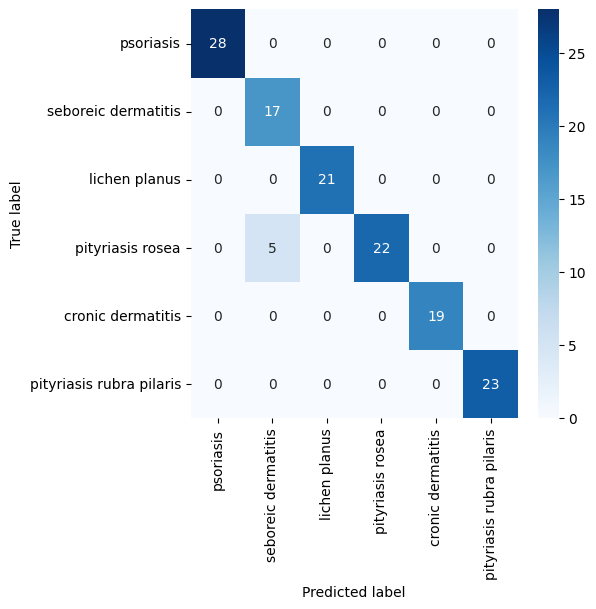

In [19]:
data_labels = ['psoriasis',
               'seboreic dermatitis',
               'lichen planus',
               'pityriasis rosea',
               'cronic dermatitis',
               'pityriasis rubra pilaris']

# Function that plots confusion matrix
# The confusion_matrix function in TensorFlow expects numerical labels (class indices), not string names.
# We will pass the true numerical labels (test_target) to the function.
def plot_confusion_matrix(true_labels, predictions, class_names):
  figure = plt.figure(figsize=(6, 6)) # Increased figure size for better readability
  # Use the true numerical labels for the confusion matrix calculation
   # Convert one-hot encoded true labels to class indices
  true_labels_indices = np.argmax(true_labels, axis=1)
  cm = confusion_matrix(labels=true_labels_indices, predictions=predictions)
  # Use the class names for the heatmap annotations for clarity
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=class_names, yticklabels=class_names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
# Get the predicted class indices
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

# Plot the confusion matrix using the true numerical test_target and the predicted class indices
# The string class_names are passed to the heatmap for labeling the axes.
plot_confusion_matrix(true_labels=test_target_cat, predictions=predictions, class_names=data_labels)